Confusion Matrix:
 [[36  7]
 [ 3 68]]
Accuracy: 0.9123
Precision: 0.9067
Recall: 0.9577
MSE: 0.0877
RMSE: 0.2962

Predictions for new inputs [14. 20.]: [1 0]


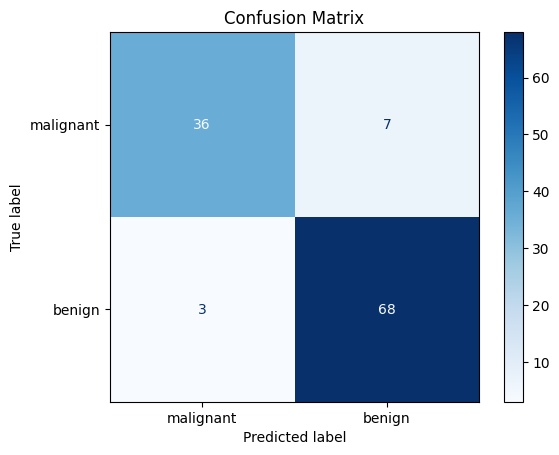

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    mean_squared_error,
    ConfusionMatrixDisplay,
)

# 1. Load dataset and reduce to 1 feature (Univariate)
data = load_breast_cancer()
X = data.data[:, [0]]  # only 1 feature: mean radius
y = data.target  # binary classification (0: malignant, 1: benign)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict on test set
y_pred = model.predict(X_test)

# 5. Evaluate
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 6. Display evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# 7. Predict on new input
new_data = np.array([[14.0], [20.0]])  # Example mean radius values
new_pred = model.predict(new_data)
print(f"\nPredictions for new inputs {new_data.ravel()}: {new_pred}")

# 8. Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
